In [1]:
%conda install sklearn

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - sklearn

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [2]:
%conda install seaborn

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [3]:
%conda install matplotlib

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [5]:
%conda install numpy
# %conda install pandas

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [9]:
# importing the dataset
dataset = pd.read_csv('F:\\AlmaBetter\\50_Startups.csv')

In [10]:
dataset.shape

(50, 5)

In [11]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [12]:
len(dataset)

50

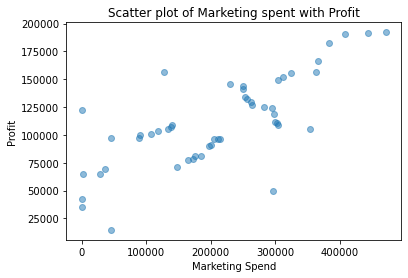

In [13]:
plt.scatter(dataset['Marketing Spend'], dataset['Profit'], alpha = 0.5)
plt.title('Scatter plot of Marketing spent with Profit')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()


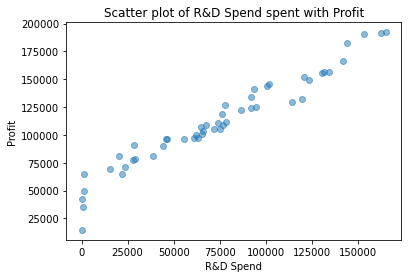

In [17]:
plt.scatter(dataset['R&D Spend'], dataset['Profit'], alpha = 0.5)
plt.title('Scatter plot of R&D Spend spent with Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

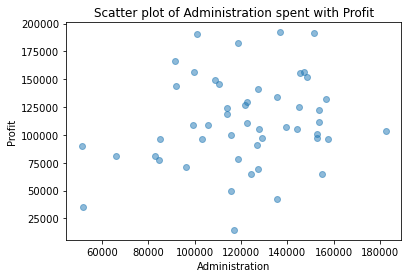

In [18]:
plt.scatter(dataset['Administration'], dataset['Profit'], alpha = 0.5)
plt.title('Scatter plot of Administration spent with Profit')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

Text(0, 0.5, 'Profit')

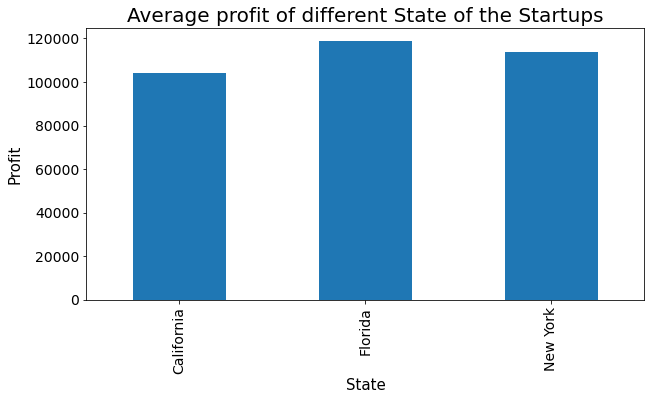

In [21]:
# Create the figure object
fig = dataset.groupby(['State'])['Profit'].mean().plot.bar(
figsize = (10,5),
fontsize = 14
)

# Create a title
fig.set_title("Average profit of different State of the Startups" , fontsize = 20)

# Creating x and y-labels
fig.set_xlabel('State', fontsize = 15)
fig.set_ylabel('Profit', fontsize = 15)

In [23]:
dataset.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [24]:
# Creating a dummy variable for the catagorical variable State
dataset["NewYork_State"] = np.where(dataset['State'] == 'New York', 1, 0)
dataset["California_State"] = np.where(dataset['State'] == 'California', 1, 0)
dataset["Florida_State"] = np.where(dataset['State'] == 'Florida', 1, 0)

# Drop the orignal colomn State from the Dataframe
dataset.drop(columns=['State'], axis=1, inplace=True)

In [26]:
dataset.shape

(50, 7)

In [28]:
dataset.head()   # OneHot encoding or Dummy variable

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [30]:
dependent_variable = 'Profit'

In [31]:
# Creating the list of independent variables
independent_variables = list(set(dataset.columns.tolist()) - {dependent_variable})

In [32]:
dependent_variable

'Profit'

In [33]:
independent_variables

['Marketing Spend',
 'California_State',
 'R&D Spend',
 'Administration',
 'NewYork_State',
 'Florida_State']

In [35]:
# Create the data od independent variables
X = dataset[independent_variables].values           # calling values is for making array

# Create the data od dependent variables
y = dataset[dependent_variable].values

In [36]:
# Spliting the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 0)

In [38]:
# Transforming Data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [39]:
X_train[0:10]

array([[0.45494286, 0.        , 0.33561668, 0.48655174, 0.        ,
        1.        ],
       [0.43561799, 0.        , 0.2782839 , 0.3173015 , 1.        ,
        0.        ],
       [0.28413435, 0.        , 0.45557444, 0.87258866, 0.        ,
        1.        ],
       [0.44680961, 1.        , 0.2807759 , 1.        , 0.        ,
        0.        ],
       [0.62511553, 0.        , 0.55488118, 0.59103645, 0.        ,
        1.        ],
       [0.68649342, 0.        , 0.7880179 , 0.88568959, 0.        ,
        1.        ],
       [0.54370828, 0.        , 0.72539353, 0.98922572, 0.        ,
        1.        ],
       [0.0040356 , 0.        , 0.0060492 , 0.6847981 , 1.        ,
        0.        ],
       [0.        , 0.        , 0.00327821, 0.00432296, 1.        ,
        0.        ],
       [0.22709197, 0.        , 0.39676926, 0.95618996, 1.        ,
        0.        ]])

In [58]:
# fitting multiple linear regression to a training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [59]:
regressor.intercept_    # Bo is the intercept

44153.95466784857

In [60]:
regressor.coef_         # these are the beta's

array([ 1.72720281e+04,  8.66383692e+01,  1.27892182e+05,  3.49927567e+03,
        7.86007422e+02, -8.72645791e+02])

In [61]:
y_pred_train = regressor.predict(X_train)       #predicted value of the y

In [62]:
y_train           # Actual value

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

In [63]:
# Predicting the test set results
y_pred = regressor.predict(X_test)

In [64]:
y_pred  # predicted profit on the test data

array([1.11273025e+10, 1.75099964e+10, 1.73790031e+10, 6.70449873e+09,
       2.70238057e+10, 1.57696772e+10, 6.01792534e+09, 9.87696381e+09,
       1.51319585e+10, 2.48187372e+10])

In [65]:
y_test # Actual y on test data

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [66]:
mean_squared_error(y_test, y_pred)

2.7350398013733994e+20

In [67]:
# Train performance
math.sqrt(mean_squared_error(y_train, y_pred_train))

9031.66661257897

In [68]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

16537955742.392708

In [69]:
r2_score(y_train, y_pred_train)

0.9501847627493607

In [70]:
r2_score(y_test, y_pred)

-213860175195.78928